![](https://spark.apache.org/images/spark-logo-trademark.png)

# Loading a file

The first thing we have to do to process a file is.. load it.
So let's give it a try and load a sample file into a dataframe.

In [1]:
from pyspark.sql import SparkSession

# Create a new SparkSession

spark = SparkSession \
    .builder \
    .appName("Introduction to Pyspark - Pyladies") \
    .getOrCreate()


# You can change Spark configuration with this syntax (Property, newValue)

spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

21/08/09 19:21:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:

# Loads file into dataframe

sales_dataframe = spark.read.csv("SalesRecords.csv")

# # Display the dataframe

sales_dataframe

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13
region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
Middle East and N...,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
Middle East and N...,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
Sub-Saharan Africa,Eritrea,Cereal,Online,H,3/4/2015,679414975,4/17/2015,2844,205.70,117.11,585010.80,333060.84,251949.96
Europe,Montenegro,Clothes,Offline,M,5/17/2012,208630645,6/28/2012,7299,109.28,35.84,797634.72,261596.16,536038.56
Central America a...,Jamaica,Vegetables,Online,H,1/29/2015,266467225,3/7/2015,2428,154.06,90.93,374057.68,220778.04,153279.64


That was easy, right? There seems to be something wrong with our column names though.

# Read options

The `read.csv` function allows options like `header` and `sep` (for separator). We can use them to proper load our file.

You can find the full list and documentation [here](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=read%20csv#pyspark.sql.DataFrameReader.csv)

In [3]:
sales_dataframe = spark.read.csv("SalesRecords.csv", header = True, sep = ",")

sales_dataframe

region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
Middle East and N...,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
Middle East and N...,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
Sub-Saharan Africa,Eritrea,Cereal,Online,H,3/4/2015,679414975,4/17/2015,2844,205.70,117.11,585010.80,333060.84,251949.96
Europe,Montenegro,Clothes,Offline,M,5/17/2012,208630645,6/28/2012,7299,109.28,35.84,797634.72,261596.16,536038.56
Central America a...,Jamaica,Vegetables,Online,H,1/29/2015,266467225,3/7/2015,2428,154.06,90.93,374057.68,220778.04,153279.64
Australia and Oce...,Fiji,Vegetables,Offline,H,12/24/2013,118598544,1/19/2014,4800,154.06,90.93,739488.00,436464.00,303024.00


That looks better, right? To see the columns' datatypes, we can check its schema.

# Schema

It's possible to check a dataframe's schema by looking at its `dtypes`

In [4]:
sales_dataframe.dtypes

[('region', 'string'),
 ('country', 'string'),
 ('item_type', 'string'),
 ('sales_channel', 'string'),
 ('order_priority', 'string'),
 ('order_date', 'string'),
 ('order_id', 'string'),
 ('ship_date', 'string'),
 ('units_sold', 'string'),
 ('unit_price', 'string'),
 ('unit_cost', 'string'),
 ('total_revenue', 'string'),
 ('total_cost', 'string'),
 ('total_profit', 'string')]

# Select

We can use `select` to view a subset of the dataframe's columns.

Docs:
https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.select

In [5]:
type_channel_dataframe = sales_dataframe.select('sales_channel', 'item_type')

type_channel_dataframe

sales_channel,item_type
Offline,Cosmetics
Online,Vegetables
Offline,Baby Food
Offline,Cereal
Offline,Fruits
Online,Cereal
Online,Cereal
Offline,Clothes
Online,Vegetables
Offline,Vegetables


# Warm-up exercise

Create and display a dataframe with `order_id` and `order_date` from the sales dataframe

In [58]:
#TODO

id_date_dataframe = None

id_date_dataframe

# selectExpr

Similar to select, `selectExpr` allows expressions to be applied to the dataframe's column(s)

Docs: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.selectExpr

In [59]:
# Concatenates the value of item_type to a string

impressed_dataframe = sales_dataframe.selectExpr("concat(item_type, ', oh wow') as impressed_item_type")

impressed_dataframe

impressed_item_type
"Cosmetics, oh wow"
"Vegetables, oh wow"
"Baby Food, oh wow"
"Cereal, oh wow"
"Fruits, oh wow"
"Cereal, oh wow"
"Cereal, oh wow"
"Clothes, oh wow"
"Vegetables, oh wow"
"Vegetables, oh wow"


# Casting

Since our dataframe was generated from a text file, all it's columns have string type by default. We can use `selectExpr` to cast them to more appropriate types.

In [7]:
# Selects and casts columns from sales_dataframe

sales_dataframe = sales_dataframe.selectExpr("region",
                                                "country",
                                                "item_type",
                                                "sales_channel",
                                                "order_priority",
                                                "to_date(order_date, 'MM/dd/yyyy') as order_date", 
                                                "order_id","to_date(ship_date, 'MM/dd/yyyy') as ship_date",
                                                "cast(units_sold as integer) as units_sold",
                                                "cast(unit_price as double) as unit_price", 
                                                "cast(unit_cost as double) as unit_cost", 
                                                "cast(total_revenue as double) as total_revenue", 
                                                "cast(total_cost as double) as total_cost",
                                                "cast(total_profit as double) as total_profit")

# Prints result schema

sales_dataframe.dtypes

[('region', 'string'),
 ('country', 'string'),
 ('item_type', 'string'),
 ('sales_channel', 'string'),
 ('order_priority', 'string'),
 ('order_date', 'date'),
 ('order_id', 'string'),
 ('ship_date', 'date'),
 ('units_sold', 'int'),
 ('unit_price', 'double'),
 ('unit_cost', 'double'),
 ('total_revenue', 'double'),
 ('total_cost', 'double'),
 ('total_profit', 'double')]

# Exercise 1

Build and show a dataframe with `unit_price` in cents instead of euros

In [61]:
# TODO

cents_dataframe = None

cents_dataframe

# Exercise 1.1

Solve the previous exercise by creating a function that gets a dataframe, transforms it and returns the transformed dataframe.

More on Python functions: https://www.w3schools.com/python/python_functions.asp

In [63]:
# TODO

def get_cents(df):
  return None

get_cents(sales_dataframe)

# Filter

`filter` can be used to conditionally display rows from your dataframe. `where` can be used as an alias.

Docs: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.filter

In [64]:
# Shows orders where country is Libya

libya_dataframe = sales_dataframe.filter('Country = "Libya"')

libya_dataframe

region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
Middle East and N...,Libya,Cosmetics,Offline,M,2014-10-18,686800706,2014-10-31,8446,437.2,263.33,3692591.2,2224085.18,1468506.02
Middle East and N...,Libya,Baby Food,Offline,C,2016-10-31,246222341,2016-12-09,1517,255.28,159.42,387259.76,241840.14,145419.62
Middle East and N...,Libya,Cereal,Offline,M,2014-03-27,964214932,2014-03-31,1480,205.7,117.11,304436.0,173322.8,131113.2
Middle East and N...,Libya,Baby Food,Offline,M,2016-12-10,635122907,2016-12-13,5837,255.28,159.42,1490069.36,930534.54,559534.82
Middle East and N...,Libya,Vegetables,Online,C,2015-01-02,276225316,2015-02-09,64,154.06,90.93,9859.84,5819.52,4040.32
Middle East and N...,Libya,Beverages,Offline,H,2011-02-04,854095017,2011-03-04,4550,47.45,31.79,215897.5,144644.5,71253.0


# Exercise 2

Build and show a dataframe with orders where the unit cost is 50% or less than the unit price.
(Remember that generated dataframes can be assigned to variables and transformations can be chained)

In [65]:
# TODO

low_cost_dataframe = None

low_cost_dataframe

# Exercise 2.1

Get the first 5 rows of your `low_cost_dataframe` using `take` and `print` them.

More on for loops: https://www.w3schools.com/python/python_for_loops.asp

In [66]:
# TODO

low_cost_5_rows = None


# groupBy

Like in sql, spark also allows you to group by one or more columns to generate aggregations.

Docs: https://spark.apache.org/docs/1.6.0/api/R/groupBy.html

In [67]:
max_unit_per_channel = sales_dataframe.groupBy('sales_channel').max('units_sold')

max_unit_per_channel

sales_channel,max(units_sold)
Online,9998
Offline,9980


# Exercise 3

Build and show a dataframe with an average of unit price per item type

Note: You can find the list of available aggregation functions here https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/functions.html

In [68]:
# TODO

average_unit_price_dataframe = None

average_unit_price_dataframe

# Exercise 3.3

Create a list of the output dataframe of Exercises 1 to 3 and print the `count` (number of rows) of each one

More on python lists: https://www.w3schools.com/python/python_lists.asp

In [69]:
# TODO

df_list = None


# Temporary tables

It is possible to register a dataframe as a temporary table and run SQL queries on top of it. For that, we first need to register the dataframe as a temp table

In [70]:
sales_dataframe.registerTempTable('sales')

# Sql

We can now run SQL queries on top of our dataframe.

In [72]:
spark.sql("select * from sales")

region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
Middle East and N...,Libya,Cosmetics,Offline,M,2014-10-18,686800706,2014-10-31,8446,437.2,263.33,3692591.2,2224085.18,1468506.02
North America,Canada,Vegetables,Online,M,2011-11-07,185941302,2011-12-08,3018,154.06,90.93,464953.08,274426.74,190526.34
Middle East and N...,Libya,Baby Food,Offline,C,2016-10-31,246222341,2016-12-09,1517,255.28,159.42,387259.76,241840.14,145419.62
Asia,Japan,Cereal,Offline,C,2010-04-10,161442649,2010-05-12,3322,205.7,117.11,683335.4,389039.42,294295.98
Sub-Saharan Africa,Chad,Fruits,Offline,H,2011-08-16,645713555,2011-08-31,9845,9.33,6.92,91853.85,68127.4,23726.45
Europe,Armenia,Cereal,Online,H,2014-11-24,683458888,2014-12-28,9528,205.7,117.11,1959909.6,1115824.08,844085.52
Sub-Saharan Africa,Eritrea,Cereal,Online,H,2015-03-04,679414975,2015-04-17,2844,205.7,117.11,585010.8,333060.84,251949.96
Europe,Montenegro,Clothes,Offline,M,2012-05-17,208630645,2012-06-28,7299,109.28,35.84,797634.72,261596.16,536038.56
Central America a...,Jamaica,Vegetables,Online,H,2015-01-29,266467225,2015-03-07,2428,154.06,90.93,374057.68,220778.04,153279.64
Australia and Oce...,Fiji,Vegetables,Offline,H,2013-12-24,118598544,2014-01-19,4800,154.06,90.93,739488.0,436464.0,303024.0


# Exercise 4

Using sql, display the total number of units sold for each of the available item types.

In [76]:

# TODO

# spark.sql()

# Bonus Challenges

To make sure no one gets bored, here's a few extra exercises. Don't hesitate to reach out if you have questions.

#### Bonus challenge 1

Solve `Exercise 4` using only Spark dataframes

In [77]:
# TODO

units_per_type = None

units_per_type

#### Bonus Challenge 2

Create and display a dataframe that adds a random number each order's total profit. You know.. for fun.
Display the updated profit and its order id.

(There is no need to generate a new random number for each row)

##### Tip

`selectExpr` and `spark.sql` might be helpful for this one

In [78]:
from random import randint

random_number = randint(0, 100)

# TODO

more_profit_dataframe = None

more_profit_dataframe

#### Bonus Challenge 3

Let's play with udf's, shall we? This time, add the random number, but a different random number for each row. *BOOM*

You might need the help of a udf for that: https://databricks.com/blog/2017/10/30/introducing-vectorized-udfs-for-pyspark.html

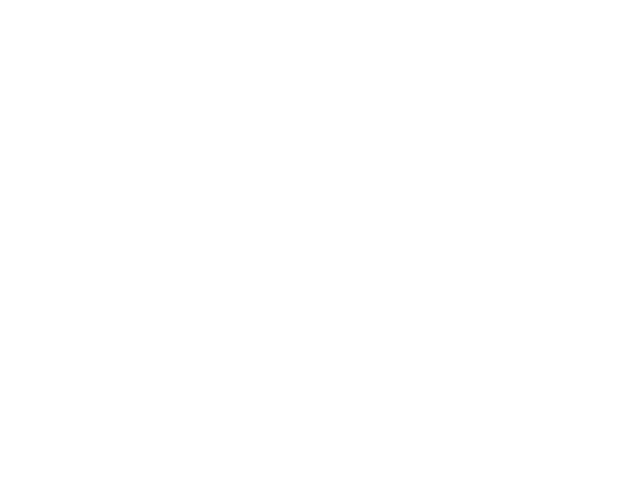

In [ ]:
from pyspark.sql.functions import udf
from random import randint

@udf('double')
def add_random(profit):
  pass

random_profit_dataframe = None

display(random_profit_dataframe)